In [140]:
#import requried lib
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
#load the dataset
data = pd.read_csv('cust_details.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Country,Response
0,1826,1970,Graduation,Divorced,84835.0,SP,1
1,1,1961,Graduation,Single,57091.0,CA,1
2,10476,1958,Graduation,Married,67267.0,US,0
3,1386,1967,Graduation,Together,32474.0,AUS,0
4,5371,1989,Graduation,Single,21474.0,SP,1


In [142]:
from sklearn.preprocessing import LabelEncoder
le_Education = LabelEncoder()
le_Marital_Status = LabelEncoder()
le_Country= LabelEncoder()

In [143]:
data['Education_n'] = le_Education.fit_transform(data['Education'])
data['Marital_Status_n'] = le_Marital_Status.fit_transform(data['Marital_Status'])
data['Country_n'] = le_Country.fit_transform(data['Country'])
data

,ID,Year_Birth,Education,Marital_Status,Income,Country,Response,Education_n,Marital_Status_n,Country_n
0,1826,1970,Graduation,Divorced,84835.0,SP,1,2,2,6
1,1,1961,Graduation,Single,57091.0,CA,1,2,4,1
2,10476,1958,Graduation,Married,67267.0,US,0,2,3,7
3,1386,1967,Graduation,Together,32474.0,AUS,0,2,5,0
4,5371,1989,Graduation,Single,21474.0,SP,1,2,4,6
...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,US,0,4,2,7
2236,5263,1977,2n Cycle,Married,31056.0,SP,0,0,3,6
2237,22,1976,Graduation,Divorced,46310.0,SP,0,2,2,6
2238,528,1978,Graduation,Married,65819.0,IND,0,2,3,3


In [144]:
data_1=data.drop(['Education','Marital_Status','Country'],axis='columns')
data_1

,ID,Year_Birth,Income,Response,Education_n,Marital_Status_n,Country_n
0,1826,1970,84835.0,1,2,2,6
1,1,1961,57091.0,1,2,4,1
2,10476,1958,67267.0,0,2,3,7
3,1386,1967,32474.0,0,2,5,0
4,5371,1989,21474.0,1,2,4,6
...,...,...,...,...,...,...,...
2235,10142,1976,66476.0,0,4,2,7
2236,5263,1977,31056.0,0,0,3,6
2237,22,1976,46310.0,0,2,2,6
2238,528,1978,65819.0,0,2,3,3


In [130]:
data_1=data_1.drop('Response',axis='columns')
data_1

,ID,Year_Birth,Income,Education_n,Marital_Status_n,Country_n
0,1826,1970,84835.0,2,2,6
1,1,1961,57091.0,2,4,1
2,10476,1958,67267.0,2,3,7
3,1386,1967,32474.0,2,5,0
4,5371,1989,21474.0,2,4,6
...,...,...,...,...,...,...
2235,10142,1976,66476.0,4,2,7
2236,5263,1977,31056.0,0,3,6
2237,22,1976,46310.0,2,2,6
2238,528,1978,65819.0,2,3,3


In [131]:
target = data['Response']
target

0       1
1       1
2       0
3       0
4       1
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2240, dtype: int64

In [132]:
data_1= data_1.fillna(method='bfill')
data_1.isna().sum()

ID                  0
Year_Birth          0
 Income             0
Education_n         0
Marital_Status_n    0
Country_n           0
dtype: int64

In [133]:
data_1.head(1)

,ID,Year_Birth,Income,Education_n,Marital_Status_n,Country_n
0,1826,1970,84835.0,2,2,6


In [134]:
x=data_1.iloc[:,:-1]
y=data_1.iloc[:,-1:]

<Axes: ylabel='count'>

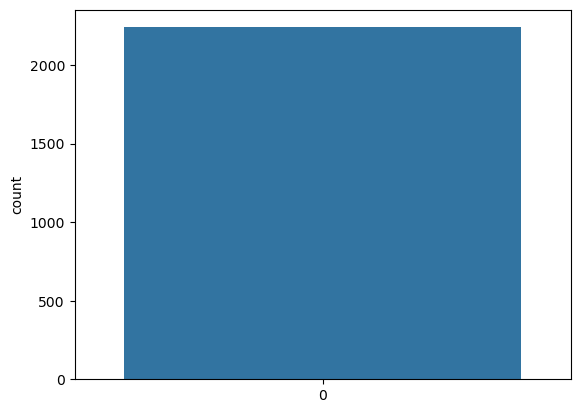

In [135]:
sns.countplot(target)

In [136]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=.25, random_state=2)

print('Training data for x-axis Shape:\t',xtrain.shape)
print()
print('Training data for y-axis shape:\t',ytrain.shape)
print()
print('***************Testing data Shape*********************\n')
print()
print('Testing data Shape\t',xtest.shape)
print()
print('Testing data Shape\t',xtrain.shape)

Training data for x-axis Shape:	 (1680, 5)

Training data for y-axis shape:	 (1680, 1)

***************Testing data Shape*********************


Testing data Shape	 (560, 5)

Testing data Shape	 (1680, 5)


In [137]:
from sklearn.tree import DecisionTreeClassifier

dt_clf=DecisionTreeClassifier()

print('Decison tree model')
print('*'*100)
print('\n Training Phase')
dt_clf.fit(xtrain,ytrain)
print('Hyperpatameter: \n',dt_clf.get_params())
print('Training completed')
print('='*100)
print('\n Test Phase')
ypred =dt_clf.predict(xtest)
print('Preditced class labeles for the test sample:\n',ypred)
print()
print('Testing completed')
print('='*100)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('='*100)
print('Decison tree - Performance Measures')
print('='*100)

print('Accuracy Score:\t\n',accuracy_score(ytest,ypred))
print('='*100)
print('Confussinon matrix:\n',confusion_matrix(ytest,ypred))
print('='*100)
print('Classificatino report: \n',classification_report(ytest,ypred))

Decison tree model
****************************************************************************************************

 Training Phase
Hyperpatameter: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training completed

 Test Phase
Preditced class labeles for the test sample:
 [6 2 6 6 6 7 2 2 0 3 0 6 6 6 6 6 7 1 3 6 5 2 6 6 6 1 5 6 6 2 5 2 5 3 5 6 0
 5 0 1 7 6 6 0 7 6 4 7 0 6 5 6 5 6 7 1 5 6 5 3 6 6 5 0 3 5 6 6 2 6 3 3 6 0
 5 6 5 6 5 6 1 0 3 6 6 7 6 6 5 6 4 6 6 6 6 6 6 2 6 1 0 0 6 2 5 3 6 6 6 5 1
 3 2 2 6 6 6 1 5 2 6 3 5 5 6 5 5 1 2 5 6 6 1 1 5 6 6 5 6 7 1 0 5 1 6 0 0 5
 6 6 6 6 6 0 5 6 6 6 6 6 6 6 6 5 2 6 6 0 6 5 5 6 2 7 2 2 2 6 0 6 1 6 6 2 7
 1 6 6 1 6 2 1 6 6 5 6 6 1 5 5 6 1 5 5 3 5 6 7 0 6 5 6 0 0 1 6 3 0 0 5 7 6
 5 3 5 5 6 6 6 6 5 6 3 1 6 5 5 2 0 1 3

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.48260649997101995, 0.984375, 'X[2] <= 30431.5\ngini = 0.72\nsamples = 1680\nvalue = [123, 203, 92, 117, 3, 255, 799, 88]'),
 Text(0.10647186223411748, 0.953125, 'X[2] <= 28374.0\ngini = 0.662\nsamples = 297\nvalue = [24, 27, 18, 21, 0, 33, 163, 11]'),
 Text(0.08312262290463446, 0.921875, 'X[2] <= 27708.0\ngini = 0.7\nsamples = 246\nvalue = [21, 26, 15, 19, 0, 32, 124, 9]'),
 Text(0.054154340986993475, 0.890625, 'X[0] <= 9219.0\ngini = 0.686\nsamples = 235\nvalue = [18, 25, 12, 18, 0, 31, 122, 9]'),
 Text(0.016352068366436587, 0.859375, 'X[2] <= 9635.0\ngini = 0.657\nsamples = 183\nvalue = [16, 20, 9, 9, 0, 20, 101, 8]'),
 Text(0.007212283420200028, 0.828125, 'X[1] <= 1981.0\ngini = 0.8\nsamples = 10\nvalue = [1, 3, 0, 1, 0, 1, 2, 2]'),
 Text(0.004808188946800019, 0.796875, 'X[2] <= 8160.0\ngini = 0.694\nsamples = 7\nvalue = [1, 3, 0, 0, 0, 1, 0, 2]'),
 Text(0.003606141710100014, 0.765625, 'X[0] <= 6598.0\ngini = 0.72\nsamples = 5\nvalue = [1, 1, 0, 0, 0, 1, 0, 2]'),
 Text(0.002

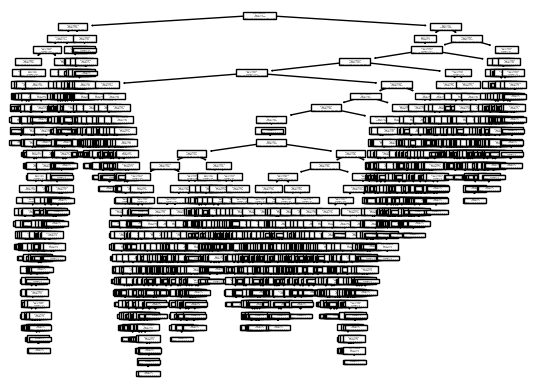

In [138]:
from sklearn import tree
tree.plot_tree(dt_clf)


[Text(0.48260649997101995, 0.984375, 'X[2] <= 30431.5\ngini = 0.72\nsamples = 1680\nvalue = [123, 203, 92, 117, 3, 255, 799, 88]'),
 Text(0.10647186223411748, 0.953125, 'X[2] <= 28374.0\ngini = 0.662\nsamples = 297\nvalue = [24, 27, 18, 21, 0, 33, 163, 11]'),
 Text(0.08312262290463446, 0.921875, 'X[2] <= 27708.0\ngini = 0.7\nsamples = 246\nvalue = [21, 26, 15, 19, 0, 32, 124, 9]'),
 Text(0.054154340986993475, 0.890625, 'X[0] <= 9219.0\ngini = 0.686\nsamples = 235\nvalue = [18, 25, 12, 18, 0, 31, 122, 9]'),
 Text(0.016352068366436587, 0.859375, 'X[2] <= 9635.0\ngini = 0.657\nsamples = 183\nvalue = [16, 20, 9, 9, 0, 20, 101, 8]'),
 Text(0.007212283420200028, 0.828125, 'X[1] <= 1981.0\ngini = 0.8\nsamples = 10\nvalue = [1, 3, 0, 1, 0, 1, 2, 2]'),
 Text(0.004808188946800019, 0.796875, 'X[2] <= 8160.0\ngini = 0.694\nsamples = 7\nvalue = [1, 3, 0, 0, 0, 1, 0, 2]'),
 Text(0.003606141710100014, 0.765625, 'X[0] <= 6598.0\ngini = 0.72\nsamples = 5\nvalue = [1, 1, 0, 0, 0, 1, 0, 2]'),
 Text(0.002

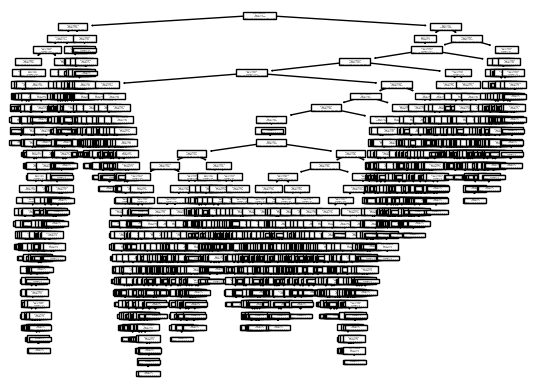

In [139]:
tree.plot_tree(dt_clf)
